<h2><center>Data Mining HW1 - DBSCAN </center></h2>
 <center>Fatma (Balcı) Ridaoui <br> 1950044013</center>

Algorithm mentioned in the book (Kumar):
<img src="dbscanalgo.png">

In [4]:
from sklearn import datasets
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import queue

In [63]:
iris_t =datasets.load_iris() #For information!!
iris =datasets.load_iris(True) #data,target

In [64]:
iris_t.columns=['Sepal length','Sepal Width','petal Length','Petal Width']

In [65]:
X = pd.DataFrame(iris_t.data)
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y = pd.DataFrame(iris_t.target)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [24]:
list(iris_t.target_names) #names of classes which means species of each plant

['setosa', 'versicolor', 'virginica']

This is more detailed version of algorithm from Kaufmann's book:
<img src="db.PNG">

In [25]:
#Mark all objects as unvisited
UNVISITED=0
VISITED =1
clusters=[]   

In [26]:
def neighborhood(eps,index,minpts,data):
    n_points=[]
    for i in range(len(data)):
        if np.linalg.norm(data[i]-data[index])<= eps:
            n_points.append(i)
    return n_points if len(n_points)>minpts else 0

In [39]:
def dbscan(data,eps,minpts):
    #1 mark all objects as unvisited
    vLabel= [UNVISITED] * len(data)
    #print("hi1")
    while (0 in vLabel):#(16)
        #print("hi2")
        #randomly select an unvisited object p
        randomP = -1
        rand_ind=-1
        while  rand_ind==-1:
            rand_ind = random.randint(0, len(data)-1)
            randomP = data[rand_ind]
         
        
        vLabel[rand_ind]=VISITED
        N=[]
        N= neighborhood(eps,rand_ind,minpts,data)
        if N !=0:
            q = []
            q.append(randomP)
            for eachp_ind in range(len(N)): # eachp is p'
                if vLabel[eachp_ind]==0:
                    vLabel[eachp_ind]=1
                    neig_P =neighborhood(eps,rand_ind,minpts,data)  
                    if neig_P!=0:
                        N.append(neig_P)
                if vLabel[eachp_ind]!=1 or vLabel[eachp_ind]!=-1:
                    q.append(data[eachp_ind])
                    
            #if not(q in clusters):
            clusters.append(q)#if not already in a cluster!!!             
        else:
            vLabel[rand_ind]=-1 #mark as noise
    return clusters


Parameters v1

In [66]:
iris_tuple=iris[:4]
eps=0.4
minpts=19

In [78]:
a.clear()
a=dbscan(iris_tuple[0],eps,minpts)

In [79]:
for i in range(len(a)):
    print("Cluster ",i,a[i])

Cluster  0 [array([5.1, 3.4, 1.5, 0.2]), array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3. , 1.4, 0.1]), array([4.3, 3. , 1.1, 0.1]), array([5.8, 4. , 1.2, 0.2]), array([5.7, 4.4, 1.5, 0.4]), array([5.4, 3.9, 1.3, 0.4]), array([5.1, 3.5, 1.4, 0.3]), array([5.7, 3.8, 1.7, 0.3]), array([5.1, 3.8, 1.5, 0.3])]
Cluster  1 [array([5.1, 3.5, 1.4, 0.3]), array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.

In [80]:
len(a)#number of clusters

18

parameters v2

In [94]:
eps=0.7
minpts=10

In [95]:
a.clear()
a=dbscan(iris_tuple[0],eps,minpts)
len(a)#number of clusters

586

parameters v3

In [97]:
eps=0.2
minpts=40
a.clear()
a=dbscan(iris_tuple[0],eps,minpts)
len(a)#number of clusters

0

Note1: when eps is low and minpts is high it is expected that one cluster will be found at least! My solution...

Note: I need to rewrite controls of clusters :/

# <center> Library Results </center>
<center>I will use library to compare my results with actual results.</center>

In [23]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [24]:
iris =datasets.load_iris()
X = pd.DataFrame((iris.data))
y = pd.DataFrame(iris.target)

In [25]:
X.columns=['Sepal length','Sepal Width','petal Length','Petal Width']

In [26]:
model = DBSCAN(eps=0.8, min_samples=19).fit(X)

In [27]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [28]:
print(Counter(model.labels_))

outliers = X[model.labels_==-1]
print(outliers)

Counter({1: 94, 0: 50, -1: 6})
     Sepal length  Sepal Width  petal Length  Petal Width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


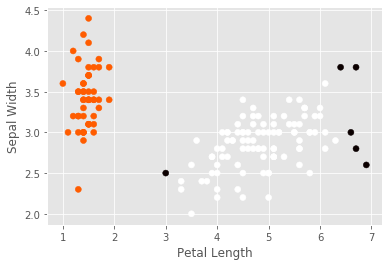

In [29]:
colors=model.labels_
plt.scatter( X.values[:,2] , X.values[:,1],c=colors )
plt.ylabel("Sepal Width")
plt.xlabel("Petal Length")
plt.show()


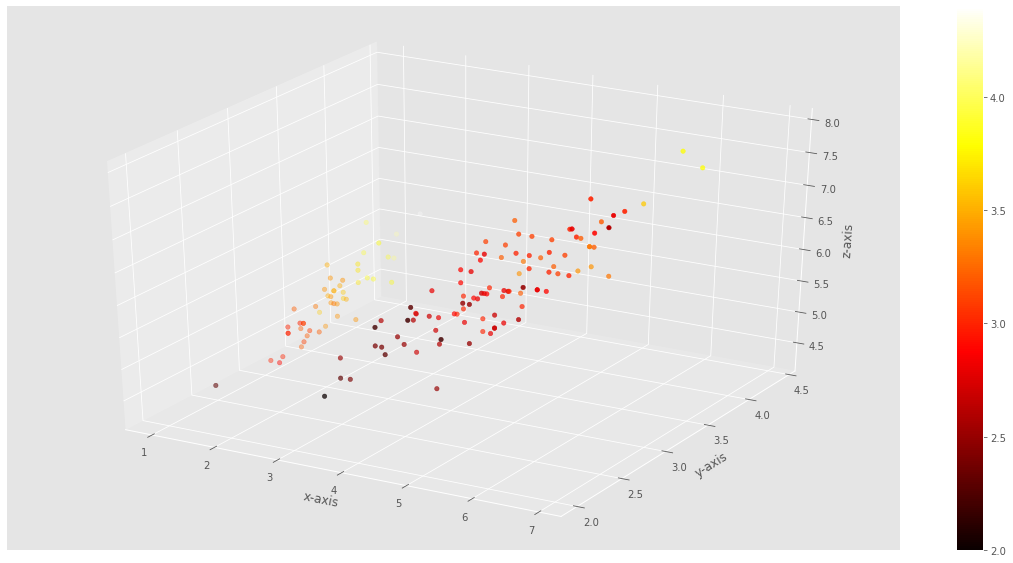

In [30]:

from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt 
from matplotlib import style 
import numpy as np 
  
# setting a custom style to use 
style.use('ggplot') 
  
# create a new figure for plotting 
fig = plt.figure(figsize=(20,10)) 
  
# create a new subplot on our figure 
# and set projection as 3d 
ax1 = fig.add_subplot(111, projection='3d') 
  
# defining x, y, z co-ordinates 
x = X.values[:,2] 
y = X.values[:,1] 
z = X.values[:,0]
t= y
# plotting the points on subplot 
pl =ax1.scatter(x, y, z, c = t, marker = 'o', cmap=plt.hot())
fig.colorbar(pl)  
# setting labels for the axes 
ax1.set_xlabel('x-axis') 
ax1.set_ylabel('y-axis') 
ax1.set_zlabel('z-axis') 
  
# function to show the plot 
plt.show()

In [31]:
model = DBSCAN(eps=0.2, min_samples=40).fit(X)

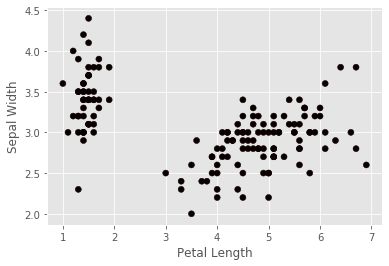

In [32]:
colors=model.labels_
plt.scatter( X.values[:,2] , X.values[:,1],c=colors )
plt.ylabel("Sepal Width")
plt.xlabel("Petal Length")
plt.show()

In [33]:
model3 = DBSCAN(eps=0.2, min_samples=5).fit(X)

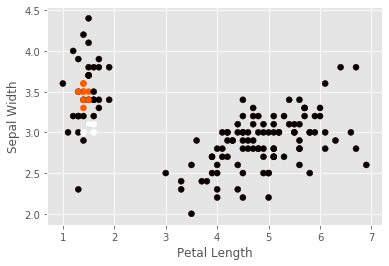

In [34]:
colors=model3.labels_
plt.scatter( X.values[:,2] , X.values[:,1],c=colors )
plt.ylabel("Sepal Width")
plt.xlabel("Petal Length")
plt.show()

## REFERENCES

<ul>
    <li>I have read algorithm explonations from
<a href="https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5"> towardsdatascience.com</a> </li>
    <li>I used <a href="https://www.amazon.com.tr/Data-Mining-Techniques-Jiawei-Han/dp/0123814790/ref=sr_1_8?__mk_tr_TR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=The+Morgan+Kaufmann+Series+in+Data+Management+Systems&qid=1607070767&sr=8-8">Kaufmann's book</a> to understand algorithm as in the figure 2.  </li>
    <li> Try except and other tips from
<a href="https://www.w3schools.com/python/python_try_except.asp">w3schools</a> as always! :)</li>

 <li>Iris dataset from 
 <a href="https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html">sklearn</a>
</li><li>Information about 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris#sklearn.datasets.load_iris">dataset</a>
</li>
    <li>More info 
<a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">about iris</a>
</li>
    <li>Queue in python <a href="https://www.geeksforgeeks.org/queue-in-python/">geeksforgeeks.org</a></li>
</ul>